add path to the directory containing modules

In [1]:
import sys
import os
module_dir = os.getcwd()+'/loom';
sys.path.append(module_dir)

In [2]:
%matplotlib tk
import api
import loom
import logging
loom.set_logging(
    logger_name='loom',
    logging_level=logging.INFO,
    logging_stream=None,
    logging_file_name='logs/loom_test.log'
)

from bokeh.plotting import show
from bokeh.io import save
from bokeh.io import output_notebook

from loom.bokeh_plot import get_spectral_network_bokeh_plot

output_notebook()

Use TkAgg backend for matplotlib.


Loading BokehJS ...

Load a configuration file.

In [3]:
d = api.SpectralNetworkData(config_file_path='config/test.ini')

Shows the loaded configuration.

In [4]:
d.config.data

{'description': 'Pure SU(2) at the origin of the Coulomb branch',
 'casimir_differentials': '{2: (1/z + u_2 + z)*(1/z^2)}',
 'root_system': 'A1',
 'representation': '1',
 'irregular_punctures': '[0, oo]',
 'differential_parameters': '{u_2 = 0}',
 'ramification_point_finding_method': 'discriminant',
 'mt_params': None,
 'regular_punctures': None,
 'ramification_points': None,
 'branch_points': None,
 'accuracy': 1e-06,
 'plot_range': [[-5, 5], [-5, 5]],
 'num_of_steps': 500,
 'num_of_iterations': 1,
 'mass_limit': 10.0,
 'phase': 1.0,
 'size_of_small_step': None,
 'size_of_large_step': None,
 'size_of_puncture_cutoff': None,
 'size_of_bp_neighborhood': None}

How to change the current configuration.

In [5]:
# d.config['num_of_steps'] = 100
# d.config['num_of_iterations'] = 1
# d.config['phase'] = 1.0
# d.config['mass_limit'] = 3.0
# d.config['ramification_point_finding_method'] = 'from_branch_points'
# d.config['branch_points'] = '[-sqrt(1/3*(-3+(2*I)/sqrt(3))), sqrt(1/3*(-3+(2*I)/sqrt(3))), -sqrt(1/3*(-3-(2*I)/sqrt(3))), sqrt(1/3*(-3-(2*I)/sqrt(3)))]'

Generate spectral networks according to the configuration.

In [6]:
d.generate()

Displays the bokeh plot of the spectral network.

In [8]:
plot_range = [[-5, 5], [-5, 5]]
f = get_spectral_network_bokeh_plot(d, plot_range=plot_range, notebook=True)
show(f)

In [7]:
plot_range = [[-3, 3], [-3, 3]]
f = get_spectral_network_bokeh_plot(d, plot_range=plot_range, notebook=True)
show(f)

In [8]:
plot_range = [[-3, 3], [-3, 3]]

f = get_spectral_network_bokeh_plot(d, plot_range=plot_range, notebook=True)

show(f)

Save spectral network data in files.

In [7]:
d.save(data_dir='data/example')

Load spectral networks from saved data.

In [9]:
# d = api.SpectralNetworkData(data_dir='data/example')

Extend spectral networks by additional steps, iterations, a new mass limit, or additional phases. 

In [10]:
# d.extend(additional_n_steps=1000, new_mass_limit=10, additional_iterations=2, additional_phases=[1.0, 3.0, 3])

Use the slider bar to change between spectral networks of different phases.

In [11]:
# plot_range = [[-5, 5], [-5, 5]]
# f = get_spectral_network_bokeh_plot(d, plot_range=plot_range, notebook=True)
# show(f)

Save the bokeh plot to an html file. (Ignore the warning message.)

Bokeh exports a plot only to a PNG format. To get a PDF plot of better quality, use matplotlib.

Bokeh exports an plot only to a PNG format. To get a PDF plot of better quality, use matplotlib.

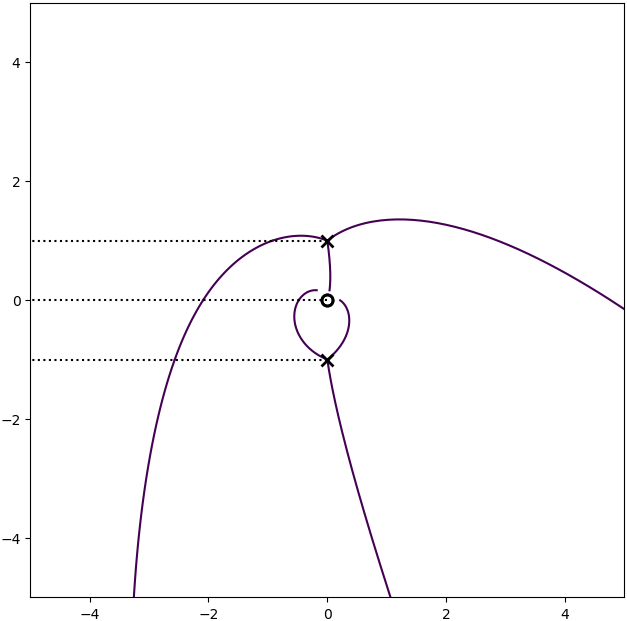

In [13]:
plot_range = [[-5, 5], [-5, 5]]
p = api.make_spectral_network_plot(d, plot_range=plot_range)
p.figure

In [14]:
p.figure.savefig('data/example.pdf', bbox_inches='tight')